In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataframe = pd.read_csv(r"indicadores_H5W1_sentencebert_Wordnet2_CLASS.csv")
dataframe

,Who,Where,When,What,Why,How,Additional information,CLASS,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w
0,0.696783,0.076060,1.0,0.505262,1.0,1.0,1.000000,entailment,0.800000,-1.000000,0.0,0.833333,0.0,1.0,0.0
1,0.762582,1.000000,1.0,0.944161,1.0,1.0,0.699488,entailment,0.947368,1.000000,1.0,1.000000,1.0,1.0,1.0
2,0.881357,0.265408,1.0,0.360803,1.0,1.0,1.000000,contradiction,1.000000,0.769231,0.0,0.833333,0.0,1.0,1.0
3,0.153366,1.000000,1.0,0.358316,1.0,1.0,1.000000,contradiction,0.666667,1.000000,0.0,1.000000,0.0,0.0,0.0
4,0.919903,0.715984,1.0,0.224679,1.0,1.0,1.000000,neutral,1.000000,1.000000,0.0,0.769231,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.706643,0.210286,1.0,0.570392,1.0,1.0,1.000000,entailment,0.947368,-1.000000,0.0,1.000000,0.0,1.0,0.0
96,0.894956,1.000000,1.0,0.830284,1.0,1.0,1.000000,entailment,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0
97,0.072305,1.000000,1.0,0.086890,1.0,1.0,1.000000,contradiction,0.705882,0.000000,0.0,0.705882,0.0,1.0,0.0
98,0.655674,1.000000,1.0,0.357686,1.0,1.0,1.000000,contradiction,1.000000,1.000000,0.0,0.750000,0.0,0.0,0.0


In [3]:
dataframe.describe()

,Who,Where,When,What,Why,How,Additional information,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.712144,0.773416,0.972706,0.496864,0.951210,0.884602,0.918129,0.927850,0.492823,0.127714,0.778082,0.135000,0.268959,0.443725
std,0.254961,0.329373,0.137323,0.327958,0.190396,0.286908,0.239915,0.164707,0.639667,0.575031,0.375084,0.598209,0.649786,0.609301
min,0.072305,0.076060,0.189548,-0.011613,-0.004532,0.026425,-0.013459,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.532159,0.492926,1.000000,0.216580,1.000000,1.000000,1.000000,0.909091,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000
50%,0.751170,1.000000,1.000000,0.456016,1.000000,1.000000,1.000000,1.000000,0.759615,0.000000,0.894444,0.000000,0.000000,0.500000
75%,0.986195,1.000000,1.000000,0.807518,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,1.000000,0.625000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


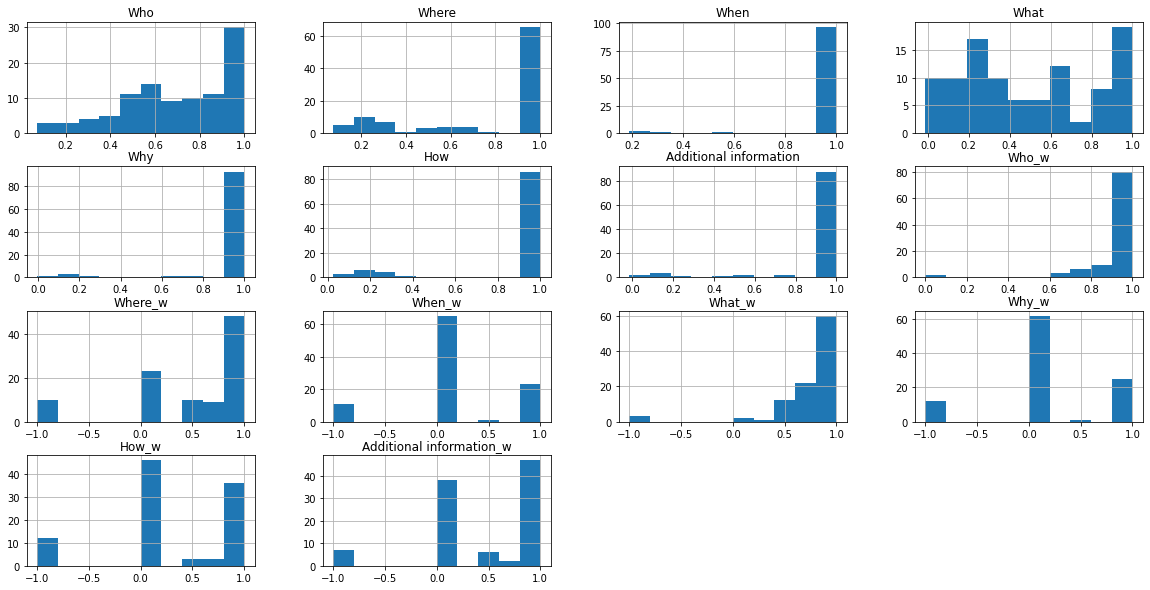

In [5]:
dataframe.hist(figsize=(20,10))
plt.show()

In [6]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [7]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_161122/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_161122/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 14)

In [8]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [9]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [10]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [11]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
model.decision_function(X)

array([[ 2.06160066e-01,  2.50992376e-01, -4.57152442e-01],
       [-1.41332757e-01,  4.31282143e-01, -2.89949386e-01],
       [-1.24237163e-01,  4.09598903e-02,  8.32772732e-02],
       [-2.98707515e-03,  5.66724984e-02, -5.36854232e-02],
       [-3.85235523e-01,  1.56698565e-01,  2.28536957e-01],
       [-1.84020820e-01, -1.33127349e-02,  1.97333555e-01],
       [-2.46739745e-01,  3.27678437e-01, -8.09386922e-02],
       [-2.59823084e-01,  1.98360146e-01,  6.14629381e-02],
       [-1.93957821e-02,  2.84068378e-01, -2.64672596e-01],
       [-4.65204905e-01,  5.23240917e-01, -5.80360117e-02],
       [-2.99681009e-01,  2.15930499e-01,  8.37505098e-02],
       [-1.62607504e-02,  1.89544219e-02, -2.69367143e-03],
       [ 2.04399037e-03,  4.18568733e-01, -4.20612723e-01],
       [-3.30089436e-03, -8.82179377e-02,  9.15188321e-02],
       [-7.26456299e-01, -7.84221002e-02,  8.04878399e-01],
       [-8.62624312e-01,  4.29405882e-01,  4.33218430e-01],
       [-1.79568774e-01,  2.50407354e-01

In [13]:
labels=np.array(['Who','Where','When','What','Why','How','Additional information','Who_w','Where_w','When_w','What_w','Why_w','How_w','Additional information_w'])

In [14]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [15]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [16]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  12 How_w 0 Who
Entailment  3 What 12 How_w
Neutral  8 Where_w 3 What


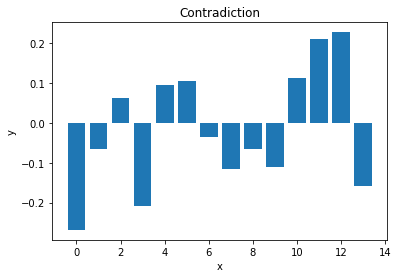

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,14,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

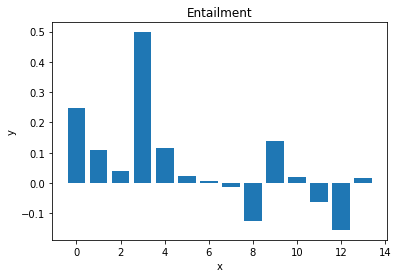

In [18]:
x_v = np.arange(0,14,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

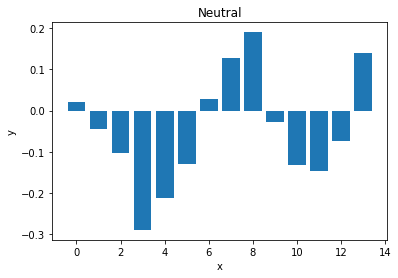

In [19]:
x_v = np.arange(0,14,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [20]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'neutral' 'entailment' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'neutral' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'neutral' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment' 'neutral'
 'entailment' 'contradiction' 'entailment' 'entailment' 'contradiction'
 'entailment' 'entailment' 'entailment' 'entail

In [56]:
pred=['entailment','entailment', 'neutral' ,'entailment' ,'neutral' ,'neutral',
 'entailment' ,'entailment' ,'entailment', 'entailment' ,'entailment',
 'entailment' ,'entailment' ,'neutral', 'neutral' ,'neutral', 'entailment',
 'entailment' ,'entailment', 'entailment', 'entailment' ,'entailment',
 'neutral' ,'entailment', 'entailment', 'entailment' ,'entailment' ,'neutral',
 'entailment', 'entailment' ,'entailment' ,'entailment', 'entailment',
 'entailment' ,'entailment' ,'entailment', 'entailment' ,'entailment',
 'entailment' ,'entailment' ,'neutral', 'neutral', 'neutral', 'neutral',
 'entailment' ,'entailment' ,'entailment' ,'entailment' ,'entailment',
 'entailment' ,'entailment' ,'entailment', 'contradiction', 'entailment',
 'entailment' ,'entailment' ,'entailment', 'neutral' ,'entailment',
 'entailment' ,'entailment', 'entailment', 'entailment', 'entailment',
 'entailment' ,'entailment' ,'entailment', 'neutral', 'entailment', 'neutral',
 'entailment' ,'contradiction', 'entailment', 'entailment', 'contradiction',
 'entailment' ,'entailment', 'entailment' ,'entailment', 'entailment',
 'neutral' ,'entailment' ,'entailment' ,'entailment' ,'contradiction',
 'neutral' ,'entailment', 'entailment', 'entailment', 'entailment', 'neutral',
 'neutral' ,'neutral', 'entailment' ,'neutral' ,'entailment' ,'entailment',
 'contradiction', 'entailment', 'neutral']

In [57]:
len(pred)

100

In [58]:
reales=['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailment', 'entailment',
       'neutral', 'contradiction', 'entailment', 'contradiction',
       'contradiction', 'contradiction', 'neutral', 'entailment',
       'entailment', 'entailment', 'entailment', 'contradiction',
       'neutral', 'entailment', 'entailment', 'entailment',
       'contradiction', 'entailment', 'entailment', 'entailment',
       'contradiction', 'contradiction', 'contradiction', 'neutral',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'entailment', 'contradiction', 'contradiction', 'contradiction']

In [59]:
len(reales)

100

In [61]:
cantidad=0
for i in range(len(y)):
    if pred[i]==reales[i]:
        cantidad+=1
print(cantidad)

52


In [22]:
X

array([[0.69678319, 0.07606002, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76258194, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.88135701, 0.26540819, 1.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.07230502, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.65567428, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61532086, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
model.score(X,y)

0.52

In [38]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [39]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.400000 (0.266927)


In [40]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5


In [41]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [42]:
print(confusion_matrix(Y_validation, predictions,labels=model.classes_))

[[0 2 1]
 [0 7 1]
 [1 5 3]]


In [43]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         3
   entailment       0.50      0.88      0.64         8
      neutral       0.60      0.33      0.43         9

     accuracy                           0.50        20
    macro avg       0.37      0.40      0.35        20
 weighted avg       0.47      0.50      0.45        20

